## Excise 1 Chess data

Task: Determine the difference in player behavior when they’re winning vs losing vs maintaining their elo score.

#### **Summary of findings**
Looks like all the games are ieshuaganocry against other players within a certain peroid. I calculate the elo rating change between two consective chess games (`elo_change`) for each user, and define winning of elo score is elo score increase more than 0, losing of elo score as elo score decrease more than 0, and no change of elo score as maintaining. From the exploratory figures and statistical tests, I found:
* most of these variables are significantly associated with winning/losing/maintaining status
* when a player is winning, he tends to have better performance in the game, which include better strategy (`tactics score`,`long_thinking_outcome_score`), less inaccuracy and mistakes in the middlegame and endgame,  less blunders throughout the opening, middlegame and endgame, and better time control (`time_advantage_score`). 
* when a player is losing, he tends to have worse performance in the game, including worse strategy (`tactics score`,`long_thinking_outcome_score`) compare with winner and maintainer, less inaccuracy and mistakes in the middlegame and endgame,  less blunders throughout the opening, middlegame and endgame, and worse time control (`time_advantage_score`).
* when a player is maintaining, his/her performance is between winning player and losing player. However, compare to the other two status, the maintaining plays have higher inaccuracy, mistakes and blunders in the opening, and their behavior back to normal in the middle and end game, which indicate they are less careful when game began and be more cautious afterwards. The maintaining player more likely to choose bullet time_class compare to the other two status, which indicates they trust their intuition more.
* The winning and losing players tends to have `Russian Game` eco, and the maintaining player tends to have `Queen's Pawn Game`.

### Data Analytics and Figures

In [1]:
# import modules need in the analytics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
chess = pd.read_csv('chess_games.csv',delimiter='\t')
pd.set_option('display.max_columns', None)

In [3]:
chess

,timestamp,outcome,moves_count,white_username,white_rating,black_username,black_rating,time_class,service,eco_name,eco_code,eco_category,white_acl,black_acl,white_opening_score,white_advantage_capitalization_winrate,white_resourcefulness_windrawrate,white_tactics_score,white_inaccuracies_per_game,white_inaccuracies_per_opening,white_inaccuracies_per_middlegame,white_inaccuracies_per_endgame,white_mistakes_per_game,white_mistakes_per_opening,white_mistakes_per_middlegame,white_mistakes_per_endgame,white_blunders_per_game,white_blunders_per_opening,white_blunders_per_middlegame,white_blunders_per_endgame,white_endgame_winrate,white_endgame_winrate_with_equal,white_endgame_winrate_with_advantage,white_endgame_winrate_with_disadvantage,white_long_thinking_outcome_score,white_time_advantage_score,white_significant_time_advantage_winrate,white_significant_time_disadvantage_winrate,black_opening_score,black_advantage_capitalization_winrate,black_resourcefulness_windrawrate,black_tactics_score,black_inaccuracies_per_game,black_inaccuracies_per_opening,black_inaccuracies_per_middlegame,black_inaccuracies_per_endgame,black_mistakes_per_game,black_mistakes_per_opening,black_mistakes_per_middlegame,black_mistakes_per_endgame,black_blunders_per_game,black_blunders_per_opening,black_blunders_per_middlegame,black_blunders_per_endgame,black_endgame_winrate,black_endgame_winrate_with_equal,black_endgame_winrate_with_advantage,black_endgame_winrate_with_disadvantage,black_long_thinking_outcome_score,black_time_advantage_score,black_significant_time_advantage_winrate,black_significant_time_disadvantage_winrate
0,1630368486,0,64,ieshuaganocry,1901,jdlax36,1869,blitz,SERVICE_LICHESS,Queen's Pawn Game: Mason Attack,D00,Queen's Pawn Game,-29.0,-19,1,0.0,0.0,0.1938,0.1875,0.250,0.2500,0.1389,0.1094,0.000,0.2000,0.0833,0.1250,0.000,0.0500,0.1944,0.0,NaN,NaN,0.0,0.5000,0.5772,0.0,NaN,1,1.0,1.0,0.4938,0.1875,0.125,0.2500,0.1667,0.0469,0.000,0.1000,0.0278,0.0781,0.000,0.1000,0.0833,1.0,NaN,1.0,NaN,0.6000,0.4228,NaN,1.0
1,1630524120,1,20,endriu777,1870,ieshuaganocry,1895,blitz,SERVICE_LICHESS,"King's Gambit Accepted, King's Knight Gambit",C37,"King's Gambit Accepted, King's Knight Gambit",-15.0,-35,0,1.0,NaN,0.6571,0.1429,0.250,0.0769,NaN,0.0476,0.000,0.0769,NaN,0.0476,0.125,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,NaN,NaN,0,NaN,0.0,0.2400,0.3000,0.125,0.4167,NaN,0.0500,0.125,0.0000,NaN,0.1500,0.250,0.0833,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN
2,1630522980,0,40,hooligandi,1808,ieshuaganocry,1901,blitz,SERVICE_LICHESS,Four Knights Game: Scotch Variation Accepted,C47,Four Knights Game,-40.0,-10,1,NaN,0.0,0.2400,0.2500,0.250,0.2000,0.3333,0.0500,0.000,0.0500,0.0833,0.1750,0.000,0.2500,0.1667,0.0,NaN,NaN,0.0,0.0000,0.9870,0.0,NaN,0,1.0,NaN,0.5500,0.0750,0.250,0.0500,0.0000,0.0500,0.000,0.1000,0.0000,0.0750,0.000,0.1500,0.0000,1.0,NaN,1.0,NaN,0.6667,0.0130,NaN,1.0
3,1630522530,1,34,ieshuaganocry,1901,hooligandi,1808,blitz,SERVICE_LICHESS,Sicilian Defense: Accelerated Dragon,B54,Sicilian Defense,-9.0,-19,1,1.0,1.0,0.9059,0.2353,0.125,0.3333,0.1818,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,1.0,1.0,NaN,NaN,0.0000,0.0000,NaN,1.0,1,0.0,0.0,0.5636,0.1818,0.000,0.2667,0.2000,0.0606,0.000,0.0667,0.1000,0.0606,0.000,0.0000,0.2000,0.0,0.0,NaN,NaN,NaN,1.0000,0.0,NaN
4,1630522212,0,57,hooligandi,1808,ieshuaganocry,1901,blitz,SERVICE_LICHESS,French Defense: Advance Variation,C02,French Defense,-25.0,-20,0,0.0,0.0,0.2474,0.2807,0.250,0.2778,0.2903,0.0526,0.000,0.1111,0.0323,0.1228,0.125,0.1111,0.1290,0.0,0.0,NaN,NaN,NaN,0.8716,NaN,NaN,1,1.0,1.0,0.4368,0.2632,0.250,0.0588,0.3750,0.0351,0.000,0.0588,0.0312,0.0877,0.125,0.1765,0.0312,1.0,1.0,NaN,NaN,NaN,0.1284,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1643033826,1,44,phantomxlr,1887,ieshuaganocry,19

In [4]:
chess.columns

Index(['timestamp', 'outcome', 'moves_count', 'white_username', 'white_rating',
       'black_username', 'black_rating', 'time_class', 'service', 'eco_name',
       'eco_code', 'eco_category', 'white_acl', 'black_acl',
       'white_opening_score', 'white_advantage_capitalization_winrate',
       'white_resourcefulness_windrawrate', 'white_tactics_score',
       'white_inaccuracies_per_game', 'white_inaccuracies_per_opening',
       'white_inaccuracies_per_middlegame', 'white_inaccuracies_per_endgame',
       'white_mistakes_per_game', 'white_mistakes_per_opening',
       'white_mistakes_per_middlegame', 'white_mistakes_per_endgame',
       'white_blunders_per_game', 'white_blunders_per_opening',
       'white_blunders_per_middlegame', 'white_blunders_per_endgame',
       'white_endgame_winrate', 'white_endgame_winrate_with_equal',
       'white_endgame_winrate_with_advantage',
       'white_endgame_winrate_with_disadvantage',
       'white_long_thinking_outcome_score', 'white_time_adv

Looks like all the games are `ieshuaganocry` against other players within a certain peroid.

In [5]:
chess['white_username'].value_counts()

white_username
ieshuaganocry         508
hooligandi             12
blandi                  4
aimchess_bot            4
smolenskychikatilo      3
                     ... 
ellakb                  1
dhrub_prasad_278        1
acrobat2747             1
heshamelsafty1          1
pithaguru               1
Name: count, Length: 453, dtype: int64

In [6]:
chess['black_username'].value_counts()

black_username
ieshuaganocry    492
aimchess_bot      15
hooligandi        10
blandi             3
am1958             3
                ... 
walid-barahal      1
amethyst101        1
omidatash          1
yevgeniy11         1
pseudoaccount      1
Name: count, Length: 468, dtype: int64

There are three outcomes. 1 means white win, 0 means black win, 2 means draw.

In [7]:
chess['outcome'].value_counts()

outcome
1    484
0    467
2     49
Name: count, dtype: int64

In [8]:
chess['time_class'].value_counts()

time_class
blitz      870
rapid      105
bullet      22
classic      3
Name: count, dtype: int64

Next I combine the data of white player and black player, and sorted by `username` and `timestamp`.

In [9]:
chess_white = chess.loc[:,['timestamp','outcome','moves_count','time_class','service','eco_name','eco_code','eco_category']+[col for col in chess.columns if 'white_' in col]]
chess_white['color'] = 'white'
chess_white['outcome1'] = 'win'
chess_white.loc[chess_white['outcome']== 0,'outcome1'] = 'lose'
chess_white.loc[chess_white['outcome']==2,'outcome1'] = 'draw'
chess_white.columns

Index(['timestamp', 'outcome', 'moves_count', 'time_class', 'service',
       'eco_name', 'eco_code', 'eco_category', 'white_username',
       'white_rating', 'white_acl', 'white_opening_score',
       'white_advantage_capitalization_winrate',
       'white_resourcefulness_windrawrate', 'white_tactics_score',
       'white_inaccuracies_per_game', 'white_inaccuracies_per_opening',
       'white_inaccuracies_per_middlegame', 'white_inaccuracies_per_endgame',
       'white_mistakes_per_game', 'white_mistakes_per_opening',
       'white_mistakes_per_middlegame', 'white_mistakes_per_endgame',
       'white_blunders_per_game', 'white_blunders_per_opening',
       'white_blunders_per_middlegame', 'white_blunders_per_endgame',
       'white_endgame_winrate', 'white_endgame_winrate_with_equal',
       'white_endgame_winrate_with_advantage',
       'white_endgame_winrate_with_disadvantage',
       'white_long_thinking_outcome_score', 'white_time_advantage_score',
       'white_significant_time_a

In [10]:
chess_black = chess.loc[:,['timestamp','outcome','moves_count','time_class','service','eco_name','eco_code','eco_category']+[col for col in chess.columns if 'black_' in col]]
chess_black['color'] = 'black'
chess_black['outcome1'] = 'win'
chess_black.loc[chess_black['outcome']== 1,'outcome1'] = 'lose'
chess_black.loc[chess_black['outcome']==2,'outcome1'] = 'draw'
chess_black.columns

Index(['timestamp', 'outcome', 'moves_count', 'time_class', 'service',
       'eco_name', 'eco_code', 'eco_category', 'black_username',
       'black_rating', 'black_acl', 'black_opening_score',
       'black_advantage_capitalization_winrate',
       'black_resourcefulness_windrawrate', 'black_tactics_score',
       'black_inaccuracies_per_game', 'black_inaccuracies_per_opening',
       'black_inaccuracies_per_middlegame', 'black_inaccuracies_per_endgame',
       'black_mistakes_per_game', 'black_mistakes_per_opening',
       'black_mistakes_per_middlegame', 'black_mistakes_per_endgame',
       'black_blunders_per_game', 'black_blunders_per_opening',
       'black_blunders_per_middlegame', 'black_blunders_per_endgame',
       'black_endgame_winrate', 'black_endgame_winrate_with_equal',
       'black_endgame_winrate_with_advantage',
       'black_endgame_winrate_with_disadvantage',
       'black_long_thinking_outcome_score', 'black_time_advantage_score',
       'black_significant_time_a

In [11]:
chess_white.columns = [col.replace('white_', '') for col in chess_white.columns]
chess_black.columns = [col.replace('black_', '') for col in chess_black.columns]

In [12]:
chess1 = pd.concat([chess_white,chess_black])
chess1

,timestamp,outcome,moves_count,time_class,service,eco_name,eco_code,eco_category,username,rating,acl,opening_score,advantage_capitalization_winrate,resourcefulness_windrawrate,tactics_score,inaccuracies_per_game,inaccuracies_per_opening,inaccuracies_per_middlegame,inaccuracies_per_endgame,mistakes_per_game,mistakes_per_opening,mistakes_per_middlegame,mistakes_per_endgame,blunders_per_game,blunders_per_opening,blunders_per_middlegame,blunders_per_endgame,endgame_winrate,endgame_winrate_with_equal,endgame_winrate_with_advantage,endgame_winrate_with_disadvantage,long_thinking_outcome_score,time_advantage_score,significant_time_advantage_winrate,significant_time_disadvantage_winrate,color,outcome1
0,1630368486,0,64,blitz,SERVICE_LICHESS,Queen's Pawn Game: Mason Attack,D00,Queen's Pawn Game,ieshuaganocry,1901,-29.0,1,0.0,0.0,0.1938,0.1875,0.250,0.2500,0.1389,0.1094,0.000,0.2000,0.0833,0.1250,0.000,0.0500,0.1944,0.0,NaN,NaN,0.0,0.5000,0.5772,0.0,NaN,white,lose
1,1630524120,1,20,blitz,SERVICE_LICHESS,"King's Gambit Accepted, King's Knight Gambit",C37,"King's Gambit Accepted, King's Knight Gambit",endriu777,1870,-15.0,0,1.0,NaN,0.6571,0.1429,0.250,0.0769,NaN,0.0476,0.000,0.0769,NaN,0.0476,0.125,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,NaN,NaN,white,win
2,1630522980,0,40,blitz,SERVICE_LICHESS,Four Knights Game: Scotch Variation Accepted,C47,Four Knights Game,hooligandi,1808,-40.0,1,NaN,0.0,0.2400,0.2500,0.250,0.2000,0.3333,0.0500,0.000,0.0500,0.0833,0.1750,0.000,0.2500,0.1667,0.0,NaN,NaN,0.0,0.0000,0.9870,0.0,NaN,white,lose
3,1630522530,1,34,blitz,SERVICE_LICHESS,Sicilian Defense: Accelerated Dragon,B54,Sicilian Defense,ieshuaganocry,1901,-9.0,1,1.0,1.0,0.9059,0.2353,0.125,0.3333,0.1818,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,1.0,1.0,NaN,NaN,0.0000,0.0000,NaN,1.0,white,win
4,1630522212,0,57,blitz,SERVICE_LICHESS,French Defense: Advance Variation,C02,French Defense,hooligandi,1808,-25.0,0,0.0,0.0,0.2474,0.2807,0.250,0.2778,0.2903,0.0526,0.000,0.1111,0.0323,0.1228,0.125,0.1111,0.1290,0.0,0.0,NaN,NaN,NaN,0.8716,NaN,NaN,white,lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1643033826,1,44,blitz,SERVICE_LICHESS,Russian Game: Cozio (Lasker) Attack,C42,Russian Game,ieshuaganocry,1903,-20.0,1,NaN,0.0,0.6186,0.1860,0.125,0.2222,0.1765,0.0698,0.000,0.1667,0.0000,0.0465,0.000,0.0556,0.0588,0.0,NaN,NaN,0.0,0.6000,0.9512,0.0,NaN,black,lose
996,1643033219,0,35,blitz,SERVICE_LICHESS,"King's Gambit Accepted, Allgaier Gambit",C39,"King's Gambit Accepted, Allgaier Gambit",maxtsourov,1973,-29.0,0,1.0,1.0,0.2457,0.1714,0.125,0.3333,0.0667,0.1143,0.125,0.2500,0.0000,0.1143,0.125,0.1667,0.0667,1.0,NaN,1.0,NaN,0.5000,0.8571,NaN,NaN,black,win
997,1643032848,1,32,blitz,SERVICE_LICHESS,"French Defense: Advance Variation, Paulsen Attack",C02,French Defense,menenjit,1912,-9.0,1,0.0,NaN,0.7290,0.0968,0.125,0.0870,NaN,0.0645,0.000,0.0870,NaN,0.0323,0.000,0.0435,NaN,NaN,NaN,NaN,NaN,0.5714,0.5614,0.0,0.0,black,lose
998,1643014690,0,48,blitz,SERVICE_LICHESS,"King's Gambit Accepted, King's Knight Gambit",C34,"King's Gambit Accepted, King's Knight Gambit",pseudoaccount,1893,-40.0,0,1.0,1.0,0.3000,0.2917,0.375,0.3056,0.0000,0.0833,0.125,0.0833,0.0000,0.1042,0.000,0.1389,0.0000,1.0,NaN,1.0,NaN,0.2000,0.2065,NaN,1.0,black,win


In [13]:
chess_player = chess1.sort_values(by = ['username','timestamp'],ascending = [True,True])
chess_player

,timestamp,outcome,moves_count,time_class,service,eco_name,eco_code,eco_category,username,rating,acl,opening_score,advantage_capitalization_winrate,resourcefulness_windrawrate,tactics_score,inaccuracies_per_game,inaccuracies_per_opening,inaccuracies_per_middlegame,inaccuracies_per_endgame,mistakes_per_game,mistakes_per_opening,mistakes_per_middlegame,mistakes_per_endgame,blunders_per_game,blunders_per_opening,blunders_per_middlegame,blunders_per_endgame,endgame_winrate,endgame_winrate_with_equal,endgame_winrate_with_advantage,endgame_winrate_with_disadvantage,long_thinking_outcome_score,time_advantage_score,significant_time_advantage_winrate,significant_time_disadvantage_winrate,color,outcome1
824,1640756692,1,12,blitz,SERVICE_LICHESS,Four Knights Game: Scotch Variation Accepted,C47,Four Knights Game,a002017,1854,-10.0,1,NaN,NaN,0.9077,0.2308,0.250,0.2000,NaN,0.0000,0.0,0.0000,NaN,0.0000,0.0,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.2000,NaN,NaN,white,win
823,1640757186,0,37,blitz,SERVICE_LICHESS,Philidor Defense,C41,Philidor Defense,a002017,1860,-29.0,0,1.0,NaN,0.3243,0.1892,0.375,0.1379,NaN,0.0000,0.0,0.0000,NaN,0.1351,0.0,0.1724,NaN,NaN,NaN,NaN,NaN,0.4000,0.4154,NaN,NaN,black,win
773,1640420484,1,26,blitz,SERVICE_LICHESS,"French Defense: Advance Variation, Euwe Variation",C02,French Defense,a10-a20,1898,-15.0,1,0.0,NaN,0.4462,0.1154,0.125,0.1176,0.0000,0.1154,0.0,0.1765,0.0000,0.0769,0.0,0.0588,1.0000,0.0,NaN,NaN,NaN,0.6667,0.1633,NaN,0.0,black,lose
749,1640176945,1,36,blitz,SERVICE_LICHESS,"Caro-Kann Defense: Advance Variation, Short Va...",B12,Caro-Kann Defense,a1d376,1835,-20.0,1,NaN,0.0,0.4111,0.2222,0.125,0.2353,0.2727,0.0833,0.0,0.0588,0.1818,0.0833,0.0,0.0588,0.1818,0.0,NaN,NaN,0.0,1.0000,0.9706,NaN,NaN,black,lose
991,1642944203,1,36,classic,SERVICE_LICHESS,Russian Game: Nimzowitsch Attack,C42,Russian Game,a_gindinson,2068,-9.0,1,1.0,NaN,0.8811,0.2162,0.125,0.2593,0.0000,0.0270,0.0,0.0370,0.0000,0.0000,0.0,0.0000,0.0000,1.0,NaN,NaN,NaN,0.0000,0.2676,NaN,NaN,white,win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,1631976810,0,38,blitz,SERVICE_LICHESS,Russian Game: Classical Attack,C42,Russian Game,zel1k,1879,-10.0,1,NaN,0.0,0.4842,0.1053,0.125,0.1111,0.0833,0.0789,0.0,0.1111,0.0833,0.0789,0.0,0.1111,0.0833,0.0,0.0,NaN,NaN,0.4000,0.4857,0.0,NaN,white,lose
769,1640436832,1,58,blitz,SERVICE_LICHESS,King's Gambit Accepted: Modern Defense,C36,King's Gambit Accepted,zema84,1827,-40.0,1,0.0,0.0,0.2158,0.2807,0.125,0.1000,0.3590,0.0702,0.0,0.0000,0.1026,0.1404,0.0,0.3000,0.1282,0.0,0.0,NaN,NaN,1.0000,0.0357,NaN,0.0,black,lose
239,1633957239,0,36,blitz,SERVICE_LICHESS,Russian Game: French Attack,C42,Russian Game,zeus007,1863,-10.0,1,NaN,0.0,0.6333,0.2500,0.125,0.3044,0.2000,0.0000,0.0,0.0000,0.0000,0.0556,0.0,0.0870,0.0000,0.0,0.0,NaN,NaN,0.6000,0.0000,NaN,0.0,white,lose
993,1643044152,0,27,blitz,SERVICE_LICHESS,Owen Defense,B00,Owen Defense,zhulenykun,1944,-9.0,1,1.0,NaN,0.7778,0.2222,0.375,0.1579,NaN,0.1111,0.0,0.1579,NaN,0.0000,0.0,0.0000,NaN,NaN,NaN,NaN,NaN,0.5000,0.5208,1.0,NaN,black,win


In [14]:
chess_player.loc[chess_player['username']=='ieshuaganocry',]

,timestamp,outcome,moves_count,time_class,service,eco_name,eco_code,eco_category,username,rating,acl,opening_score,advantage_capitalization_winrate,resourcefulness_windrawrate,tactics_score,inaccuracies_per_game,inaccuracies_per_opening,inaccuracies_per_middlegame,inaccuracies_per_endgame,mistakes_per_game,mistakes_per_opening,mistakes_per_middlegame,mistakes_per_endgame,blunders_per_game,blunders_per_opening,blunders_per_middlegame,blunders_per_endgame,endgame_winrate,endgame_winrate_with_equal,endgame_winrate_with_advantage,endgame_winrate_with_disadvantage,long_thinking_outcome_score,time_advantage_score,significant_time_advantage_winrate,significant_time_disadvantage_winrate,color,outcome1
0,1630368486,0,64,blitz,SERVICE_LICHESS,Queen's Pawn Game: Mason Attack,D00,Queen's Pawn Game,ieshuaganocry,1901,-29.0,1,0.0,0.0,0.1938,0.1875,0.250,0.2500,0.1389,0.1094,0.000,0.2000,0.0833,0.1250,0.000,0.0500,0.1944,0.0,NaN,NaN,0.0,0.5000,0.5772,0.0,NaN,white,lose
6,1630521672,1,48,blitz,SERVICE_LICHESS,Scotch Game,C45,Scotch Game,ieshuaganocry,1901,-20.0,0,0.0,NaN,0.6167,0.1458,0.125,0.1389,0.2500,0.1042,0.375,0.0556,0.0000,0.0417,0.000,0.0556,0.0000,0.0,NaN,0.0,NaN,0.0000,0.0323,NaN,NaN,black,lose
5,1630521800,1,24,blitz,SERVICE_LICHESS,Queen's Pawn Game: London System,D02,Queen's Pawn Game,ieshuaganocry,1901,-10.0,1,1.0,NaN,0.7667,0.0833,0.000,0.1250,NaN,0.0000,0.000,0.0000,NaN,0.0417,0.000,0.0625,NaN,NaN,NaN,NaN,NaN,NaN,0.2619,NaN,NaN,white,win
4,1630522212,0,57,blitz,SERVICE_LICHESS,French Defense: Advance Variation,C02,French Defense,ieshuaganocry,1901,-20.0,1,1.0,1.0,0.4368,0.2632,0.250,0.0588,0.3750,0.0351,0.000,0.0588,0.0312,0.0877,0.125,0.1765,0.0312,1.0,1.0,NaN,NaN,NaN,0.1284,NaN,NaN,black,win
3,1630522530,1,34,blitz,SERVICE_LICHESS,Sicilian Defense: Accelerated Dragon,B54,Sicilian Defense,ieshuaganocry,1901,-9.0,1,1.0,1.0,0.9059,0.2353,0.125,0.3333,0.1818,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,1.0,1.0,NaN,NaN,0.0000,0.0000,NaN,1.0,white,win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1643032848,1,32,blitz,SERVICE_LICHESS,"French Defense: Advance Variation, Paulsen Attack",C02,French Defense,ieshuaganocry,1914,-40.0,1,NaN,1.0,0.6000,0.3438,0.125,0.4167,NaN,0.1250,0.000,0.1667,NaN,0.0312,0.000,0.0417,NaN,NaN,NaN,NaN,NaN,0.6667,0.4386,1.0,1.0,white,win
996,1643033219,0,35,blitz,SERVICE_LICHESS,"King's Gambit Accepted, Allgaier Gambit",C39,"King's Gambit Accepted, Allgaier Gambit",ieshuaganocry,1909,-40.0,1,0.0,0.0,0.2829,0.2857,0.375,0.0769,0.4286,0.0571,0.000,0.1538,0.0000,0.1143,0.000,0.2308,0.0714,0.0,NaN,NaN,0.0,1.0000,0.1429,NaN,NaN,white,lose
995,1643033826,1,44,blitz,SERVICE_LICHESS,Russian Game: Cozio (Lasker) Attack,C42,Russian Game,ieshuaganocry,1903,-20.0,1,NaN,0.0,0.6186,0.1860,0.125,0.2222,0.1765,0.0698,0.000,0.1667,0.0000,0.0465,0.000,0.0556,0.0588,0.0,NaN,NaN,0.0,0.6000,0.9512,0.0,NaN,black,lose
994,1643040375,1,30,classic,SERVICE_LICHESS,Petrov's Defense,C42,Petrov's Defense,ieshuaganocry,1932,-30.0,0,NaN,0.0,0.2345,0.2069,0.250,0.1905,NaN,0.0690,0.125,0.0476,NaN,0.1379,0.000,0.1905,NaN,NaN,NaN,NaN,NaN,NaN,0.6981,NaN,NaN,black,lose


Next I calculate the elo rating change between two consective chess games for each user. This variable (`elo_change`) can be used to define winning, losing, and maintaining status of the players.

In [15]:
chess_player['elo_change'] = chess_player.groupby('username')['rating'].diff()
chess_player.loc[chess_player['username']=='ieshuaganocry',]

,timestamp,outcome,moves_count,time_class,service,eco_name,eco_code,eco_category,username,rating,acl,opening_score,advantage_capitalization_winrate,resourcefulness_windrawrate,tactics_score,inaccuracies_per_game,inaccuracies_per_opening,inaccuracies_per_middlegame,inaccuracies_per_endgame,mistakes_per_game,mistakes_per_opening,mistakes_per_middlegame,mistakes_per_endgame,blunders_per_game,blunders_per_opening,blunders_per_middlegame,blunders_per_endgame,endgame_winrate,endgame_winrate_with_equal,endgame_winrate_with_advantage,endgame_winrate_with_disadvantage,long_thinking_outcome_score,time_advantage_score,significant_time_advantage_winrate,significant_time_disadvantage_winrate,color,outcome1,elo_change
0,1630368486,0,64,blitz,SERVICE_LICHESS,Queen's Pawn Game: Mason Attack,D00,Queen's Pawn Game,ieshuaganocry,1901,-29.0,1,0.0,0.0,0.1938,0.1875,0.250,0.2500,0.1389,0.1094,0.000,0.2000,0.0833,0.1250,0.000,0.0500,0.1944,0.0,NaN,NaN,0.0,0.5000,0.5772,0.0,NaN,white,lose,NaN
6,1630521672,1,48,blitz,SERVICE_LICHESS,Scotch Game,C45,Scotch Game,ieshuaganocry,1901,-20.0,0,0.0,NaN,0.6167,0.1458,0.125,0.1389,0.2500,0.1042,0.375,0.0556,0.0000,0.0417,0.000,0.0556,0.0000,0.0,NaN,0.0,NaN,0.0000,0.0323,NaN,NaN,black,lose,0.0
5,1630521800,1,24,blitz,SERVICE_LICHESS,Queen's Pawn Game: London System,D02,Queen's Pawn Game,ieshuaganocry,1901,-10.0,1,1.0,NaN,0.7667,0.0833,0.000,0.1250,NaN,0.0000,0.000,0.0000,NaN,0.0417,0.000,0.0625,NaN,NaN,NaN,NaN,NaN,NaN,0.2619,NaN,NaN,white,win,0.0
4,1630522212,0,57,blitz,SERVICE_LICHESS,French Defense: Advance Variation,C02,French Defense,ieshuaganocry,1901,-20.0,1,1.0,1.0,0.4368,0.2632,0.250,0.0588,0.3750,0.0351,0.000,0.0588,0.0312,0.0877,0.125,0.1765,0.0312,1.0,1.0,NaN,NaN,NaN,0.1284,NaN,NaN,black,win,0.0
3,1630522530,1,34,blitz,SERVICE_LICHESS,Sicilian Defense: Accelerated Dragon,B54,Sicilian Defense,ieshuaganocry,1901,-9.0,1,1.0,1.0,0.9059,0.2353,0.125,0.3333,0.1818,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,1.0,1.0,NaN,NaN,0.0000,0.0000,NaN,1.0,white,win,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1643032848,1,32,blitz,SERVICE_LICHESS,"French Defense: Advance Variation, Paulsen Attack",C02,French Defense,ieshuaganocry,1914,-40.0,1,NaN,1.0,0.6000,0.3438,0.125,0.4167,NaN,0.1250,0.000,0.1667,NaN,0.0312,0.000,0.0417,NaN,NaN,NaN,NaN,NaN,0.6667,0.4386,1.0,1.0,white,win,6.0
996,1643033219,0,35,blitz,SERVICE_LICHESS,"King's Gambit Accepted, Allgaier Gambit",C39,"King's Gambit Accepted, Allgaier Gambit",ieshuaganocry,1909,-40.0,1,0.0,0.0,0.2829,0.2857,0.375,0.0769,0.4286,0.0571,0.000,0.1538,0.0000,0.1143,0.000,0.2308,0.0714,0.0,NaN,NaN,0.0,1.0000,0.1429,NaN,NaN,white,lose,-5.0
995,1643033826,1,44,blitz,SERVICE_LICHESS,Russian Game: Cozio (Lasker) Attack,C42,Russian Game,ieshuaganocry,1903,-20.0,1,NaN,0.0,0.6186,0.1860,0.125,0.2222,0.1765,0.0698,0.000,0.1667,0.0000,0.0465,0.000,0.0556,0.0588,0.0,NaN,NaN,0.0,0.6000,0.9512,0.0,NaN,black,lose,-6.0
994,1643040375,1,30,classic,SERVICE_LICHESS,Petrov's Defense,C42,Petrov's Defense,ieshuaganocry,1932,-30.0,0,NaN,0.0,0.2345,0.2069,0.250,0.1905,NaN,0.0690,0.125,0.0476,NaN,0.1379,0.000,0.1905,NaN,NaN,NaN,NaN,NaN,NaN,0.6981,NaN,NaN,black,lose,29.0


In [16]:
chess_player.loc[~chess_player['elo_change'].isna(),]

,timestamp,outcome,moves_count,time_class,service,eco_name,eco_code,eco_category,username,rating,acl,opening_score,advantage_capitalization_winrate,resourcefulness_windrawrate,tactics_score,inaccuracies_per_game,inaccuracies_per_opening,inaccuracies_per_middlegame,inaccuracies_per_endgame,mistakes_per_game,mistakes_per_opening,mistakes_per_middlegame,mistakes_per_endgame,blunders_per_game,blunders_per_opening,blunders_per_middlegame,blunders_per_endgame,endgame_winrate,endgame_winrate_with_equal,endgame_winrate_with_advantage,endgame_winrate_with_disadvantage,long_thinking_outcome_score,time_advantage_score,significant_time_advantage_winrate,significant_time_disadvantage_winrate,color,outcome1,elo_change
823,1640757186,0,37,blitz,SERVICE_LICHESS,Philidor Defense,C41,Philidor Defense,a002017,1860,-29.0,0,1.0,NaN,0.3243,0.1892,0.375,0.1379,NaN,0.0000,0.000,0.0000,NaN,0.1351,0.0,0.1724,NaN,NaN,NaN,NaN,NaN,0.4000,0.4154,NaN,NaN,black,win,6.0
731,1640004514,1,20,blitz,SERVICE_LICHESS,"King's Gambit Accepted, Cunningham Defense",C35,"King's Gambit Accepted, Cunningham Defense",abdelghafour55,1896,-70.0,0,NaN,0.0,0.1105,0.3684,0.500,0.2727,NaN,0.1579,0.125,0.1818,NaN,0.1579,0.0,0.2727,NaN,NaN,NaN,NaN,NaN,NaN,0.8000,NaN,NaN,black,lose,-6.0
751,1640153656,0,19,blitz,SERVICE_LICHESS,Sicilian Defense: French Variation,B40,Sicilian Defense,adasha05,2005,0.0,1,1.0,NaN,0.8947,0.1053,0.000,0.1818,NaN,0.0526,0.000,0.0909,NaN,0.0000,0.0,0.0000,NaN,NaN,NaN,NaN,NaN,0.6667,0.5625,NaN,1.0,black,win,4.0
863,1640958243,0,55,blitz,SERVICE_LICHESS,Petrov's Defense,C42,Petrov's Defense,advthor,1874,-29.0,1,NaN,0.0,0.4200,0.2727,0.125,0.0588,0.4333,0.1091,0.000,0.0588,0.1667,0.0727,0.0,0.0000,0.1333,0.0,0.0,NaN,NaN,0.2500,0.8396,0.0,NaN,white,lose,-6.0
472,1638137318,0,44,blitz,SERVICE_LICHESS,Petrov's Defense,C42,Petrov's Defense,ahadizade,1889,-10.0,1,NaN,0.0,0.6273,0.2500,0.125,0.3636,0.1429,0.0455,0.000,0.0909,0.0000,0.0455,0.0,0.0000,0.1429,0.0,NaN,NaN,0.0,0.2500,0.8095,0.0,0.0,white,lose,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,1631266153,2,60,blitz,SERVICE_LICHESS,"Danish Gambit Declined, Sorensen Defense",C21,"Danish Gambit Declined, Sorensen Defense",wahyudin_1507,1915,-39.0,1,0.0,NaN,0.4754,0.0820,0.500,0.0667,0.0000,0.0164,0.000,0.0667,0.0000,0.0984,0.0,0.1333,0.1053,0.0,NaN,0.0,NaN,NaN,0.9741,0.0,NaN,white,draw,0.0
42,1631266313,1,24,blitz,SERVICE_LICHESS,Queen's Pawn Game: London System,D02,Queen's Pawn Game,wahyudin_1507,1909,-15.0,1,NaN,0.0,0.2500,0.1250,0.000,0.1875,NaN,0.0833,0.000,0.1250,NaN,0.1250,0.0,0.1875,NaN,NaN,NaN,NaN,NaN,NaN,0.9773,NaN,NaN,black,lose,-6.0
904,1641889771,0,22,blitz,SERVICE_LICHESS,"King's Gambit Accepted, Modern Defense",C36,"King's Gambit Accepted, Modern Defense",waraskiz,1956,-25.0,0,1.0,NaN,0.8182,0.1818,0.375,0.0714,NaN,0.0909,0.125,0.0714,NaN,0.0000,0.0,0.0000,NaN,NaN,NaN,NaN,NaN,1.0000,0.8421,1.0,NaN,black,win,5.0
352,1636195991,0,37,blitz,SERVICE_LICHESS,Caro-Kann Defense,B10,Caro-Kann Defense,wasilii,1864,-10.0,1,1.0,NaN,0.9676,0.0811,0.000,0.1765,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,1.0,NaN,1.0,NaN,0.5000,0.4714,NaN,NaN,black,win,7.0


Below is the histogram of the elo rating change.

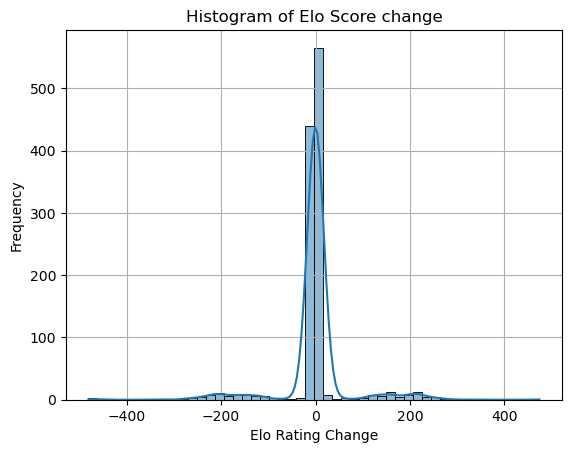

In [17]:
## histogram of the elo score
sns.histplot(chess_player['elo_change'], bins=50, kde=True, edgecolor='black')  
plt.xlabel('Elo Rating Change')  
plt.ylabel('Frequency')  
plt.title('Histogram of Elo Score change') 
plt.grid(True)  
plt.show()

I define winning of elo score is elo score increase more than 0, losing of elo score as elo score decrease more than 0, and no change of elo score as maintaining.

In [18]:
chess_player['elo_change_category'] = np.nan
chess_player.loc[chess_player['elo_change'] == 0,'elo_change_category'] = 'maintain'
chess_player.loc[chess_player['elo_change'] > 0,'elo_change_category'] = 'win'
chess_player.loc[chess_player['elo_change'] < 0,'elo_change_category'] = 'lose'

We do Chi-square tests for categorical variables. All these categorical variables are significantly associated with elo changing status, even after bonferroni correction. That's not suprizing since most of the categorical data is win rate, so it definitely associated with winning status.

In [19]:
categorical_var = ['eco_category',
                   'time_class',
                   'opening_score',
                   'advantage_capitalization_winrate',
                  'resourcefulness_windrawrate',
                  'endgame_winrate',
                  'endgame_winrate_with_equal',
                  'endgame_winrate_with_advantage',
                  'endgame_winrate_with_disadvantage',
                  'significant_time_advantage_winrate',
                  'significant_time_disadvantage_winrate']

for i,variable in enumerate(categorical_var):
    elo_vs_eco_perc = pd.crosstab(chess_player['elo_change_category'], chess_player[variable])
    #print(elo_vs_eco_perc)
    
    chi2, p_value, dof, expected = stats.chi2_contingency(elo_vs_eco_perc)
    print(f'Chi square test for {variable}, p = {round(p_value,4)}')

Chi square test for eco_category, p = 0.0001
Chi square test for time_class, p = 0.0
Chi square test for opening_score, p = 0.001
Chi square test for advantage_capitalization_winrate, p = 0.0
Chi square test for resourcefulness_windrawrate, p = 0.0
Chi square test for endgame_winrate, p = 0.0
Chi square test for endgame_winrate_with_equal, p = 0.0
Chi square test for endgame_winrate_with_advantage, p = 0.0
Chi square test for endgame_winrate_with_disadvantage, p = 0.0
Chi square test for significant_time_advantage_winrate, p = 0.0
Chi square test for significant_time_disadvantage_winrate, p = 0.0


Below I show the fraction in winning/losing/maintaining players for the top 10 eco categories. The winning and losing players tends to have `Russian Game` eco, and the maintaining player tends to have `Queen's Pawn Game`.

In [20]:
top_eco = chess_player['eco_category'].value_counts()[:10]
top_eco_name = top_eco.index.tolist()
top_eco 

eco_category
Russian Game               266
Sicilian Defense           216
Queen's Pawn Game          202
French Defense             130
Queen's Gambit Declined    118
Four Knights Game           96
Scotch Game                 78
Petrov's Defense            54
English Opening             50
Caro-Kann Defense           48
Name: count, dtype: int64

In [21]:
elo_vs_eco_perc = round(pd.crosstab(chess_player['elo_change_category'], chess_player['eco_category'],normalize = 'index').reindex(columns = top_eco_name),2)
elo_vs_eco_perc

eco_category,Russian Game,Sicilian Defense,Queen's Pawn Game,French Defense,Queen's Gambit Declined,Four Knights Game,Scotch Game,Petrov's Defense,English Opening,Caro-Kann Defense
elo_change_category,,,,,,,,,,
lose,0.12,0.11,0.10,0.07,0.06,0.05,0.04,0.03,0.03,0.03
maintain,0.09,0.09,0.12,0.05,0.03,0.11,0.09,0.03,0.05,0.02
win,0.14,0.11,0.10,0.07,0.06,0.05,0.03,0.03,0.02,0.02


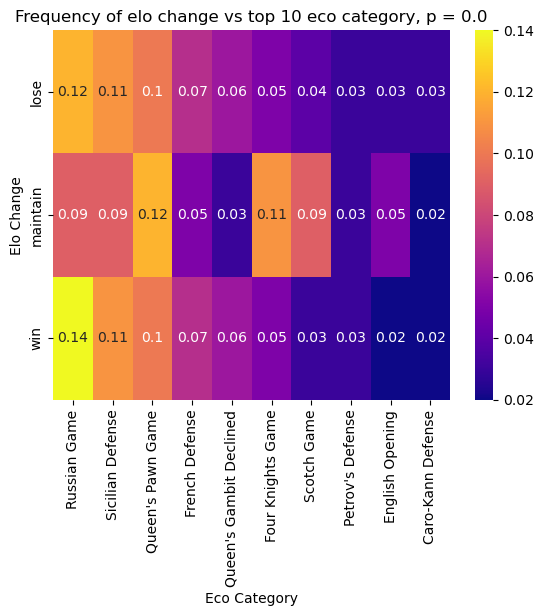

In [22]:
elo_vs_eco = pd.crosstab(chess_player['elo_change_category'], chess_player['eco_category'])

chi2, p_value, dof, expected = stats.chi2_contingency(elo_vs_eco)

sns.heatmap(elo_vs_eco_perc, annot=True, cmap='plasma')  

plt.title(f'Frequency of elo change vs top 10 eco category, p = {round(p_value,2)}')
plt.xlabel('Eco Category')
plt.ylabel('Elo Change')

plt.show()

Below are the tabulate tables and the percentage of each category when the players are in winning,  losing, and maintaining status.

time_class           blitz  bullet  classic  rapid  Total
elo_change_category                                      
lose                   489       5        0     27    521
maintain                74      32        0     13    119
win                    431       2        3     77    513
Total                  994      39        3    117   1153


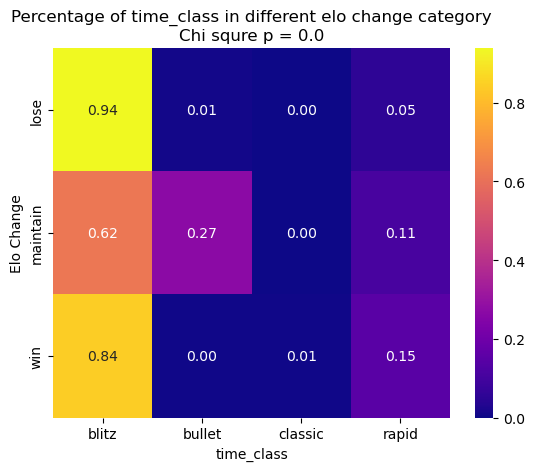

opening_score          0    1  Total
elo_change_category                 
lose                 119  402    521
maintain              26   93    119
win                   72  441    513
Total                217  936   1153


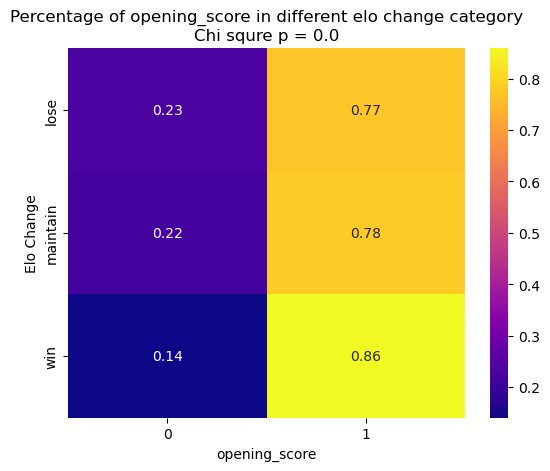

advantage_capitalization_winrate  0.0  1.0  Total
elo_change_category                              
lose                              125   29    154
maintain                           26   34     60
win                                20  380    400
Total                             171  443    614


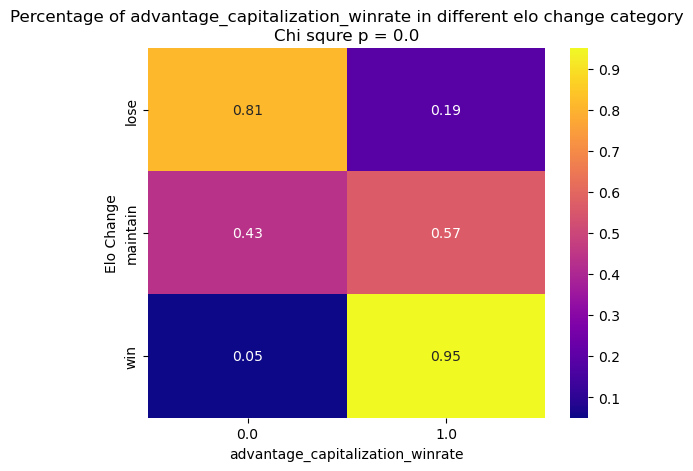

resourcefulness_windrawrate  0.0  1.0  Total
elo_change_category                         
lose                         436   17    453
maintain                      33   26     59
win                           31  174    205
Total                        500  217    717


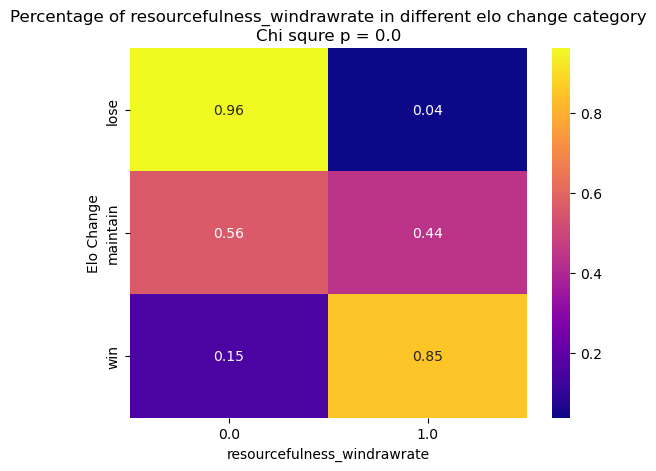

endgame_winrate      0.0  1.0  Total
elo_change_category                 
lose                 306   19    325
maintain              41   19     60
win                   35  259    294
Total                382  297    679


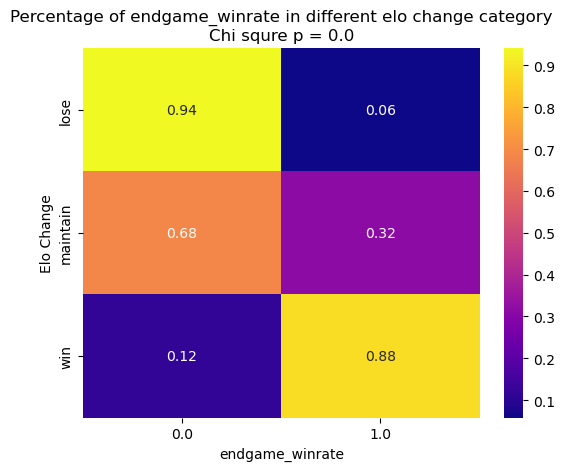

endgame_winrate_with_equal  0.0  1.0  Total
elo_change_category                        
lose                         52    3     55
maintain                     11    5     16
win                          12   54     66
Total                        75   62    137


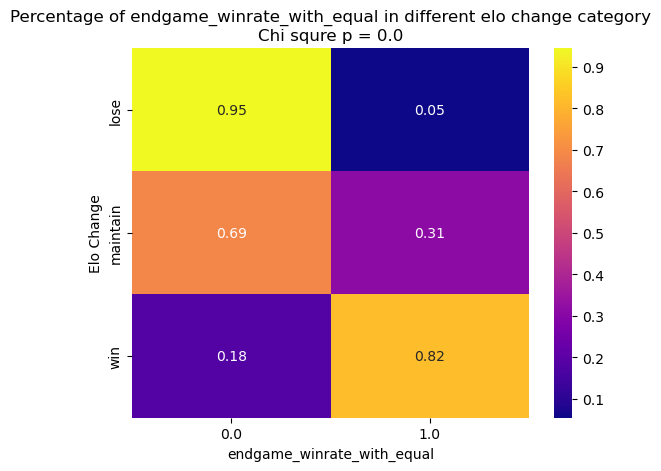

endgame_winrate_with_advantage  0.0  1.0  Total
elo_change_category                            
lose                             34   12     46
maintain                          9   13     22
win                               6  145    151
Total                            49  170    219


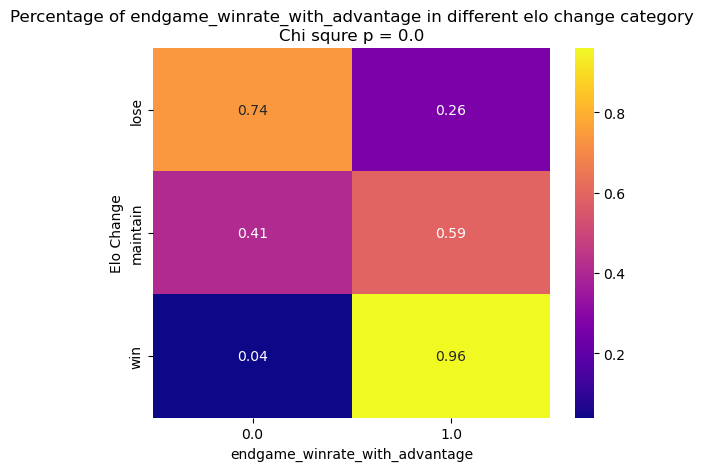

endgame_winrate_with_disadvantage  0.0  1.0  Total
elo_change_category                               
lose                               194    2    196
maintain                            19    0     19
win                                 16   39     55
Total                              229   41    270


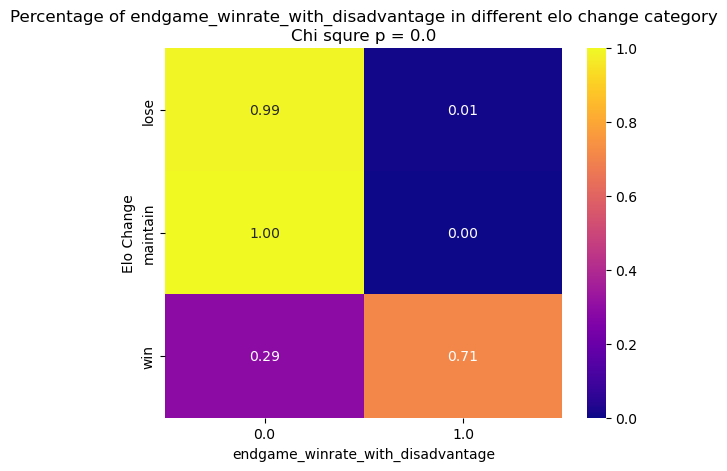

significant_time_advantage_winrate  0.0  1.0  Total
elo_change_category                                
lose                                126   12    138
maintain                             17   14     31
win                                   7  154    161
Total                               150  180    330


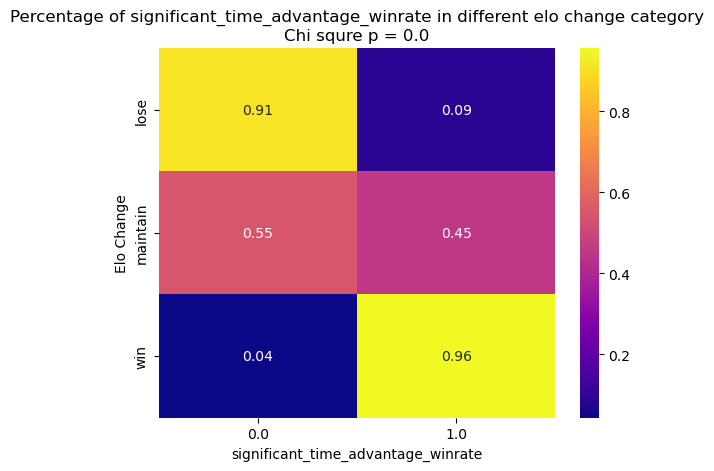

significant_time_disadvantage_winrate  0.0  1.0  Total
elo_change_category                                   
lose                                   238   15    253
maintain                                20   12     32
win                                     26  175    201
Total                                  284  202    486


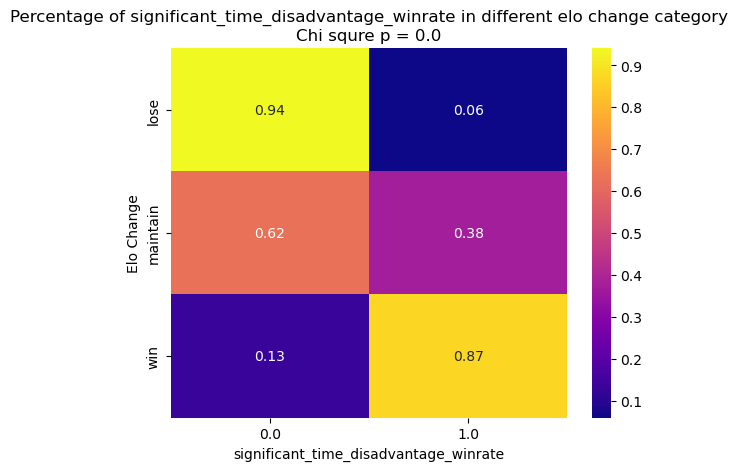

In [23]:
for i, variable in enumerate(categorical_var[1:]):
    tabulate = pd.crosstab(chess_player['elo_change_category'], chess_player[variable],margins=True, margins_name='Total')
    print(tabulate)
    chi2, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(chess_player['elo_change_category'], chess_player[variable]))
    sns.heatmap(pd.crosstab(chess_player['elo_change_category'], chess_player[variable],normalize = 'index'), annot=True, cmap='plasma', fmt='.2f')  
    plt.title(f'Percentage of {variable} in different elo change category\nChi squre p = {round(p_value,2)}')
    plt.xlabel(variable)
    plt.ylabel('Elo Change')
    plt.show()

We do ANOVA for continuous variables, and all these variables are significantly associated with elo changing status, except mistake per opening and inaccuracy per opening.

In [24]:
continuous_var = ['tactics_score',
                  'inaccuracies_per_game',
                  'inaccuracies_per_opening',
                  'inaccuracies_per_middlegame',
                  'inaccuracies_per_endgame',
                  'mistakes_per_game',
                  'mistakes_per_opening',
                  'mistakes_per_middlegame',
                  'mistakes_per_endgame',
                  'blunders_per_game',
                  'blunders_per_opening',
                  'blunders_per_middlegame',
                  'long_thinking_outcome_score',
                  'time_advantage_score'
                  ]

ANOVA for tactics_score, p = 0.0
                         mean  median
elo_change_category                  
lose                 0.445407  0.4319
maintain             0.636979  0.6842
win                  0.706308  0.7482
ANOVA for inaccuracies_per_game, p = 0.0
                         mean  median
elo_change_category                  
lose                 0.201002  0.1944
maintain             0.168423  0.1579
win                  0.158758  0.1538
ANOVA for inaccuracies_per_opening, p = 0.14
                         mean  median
elo_change_category                  
lose                 0.146161   0.125
maintain             0.165416   0.125
win                  0.137886   0.125
ANOVA for inaccuracies_per_middlegame, p = 0.0
                         mean  median
elo_change_category                  
lose                 0.233282  0.2273
maintain             0.191387  0.1875
win                  0.196985  0.1905
ANOVA for inaccuracies_per_endgame, p = 0.0
                         mean 

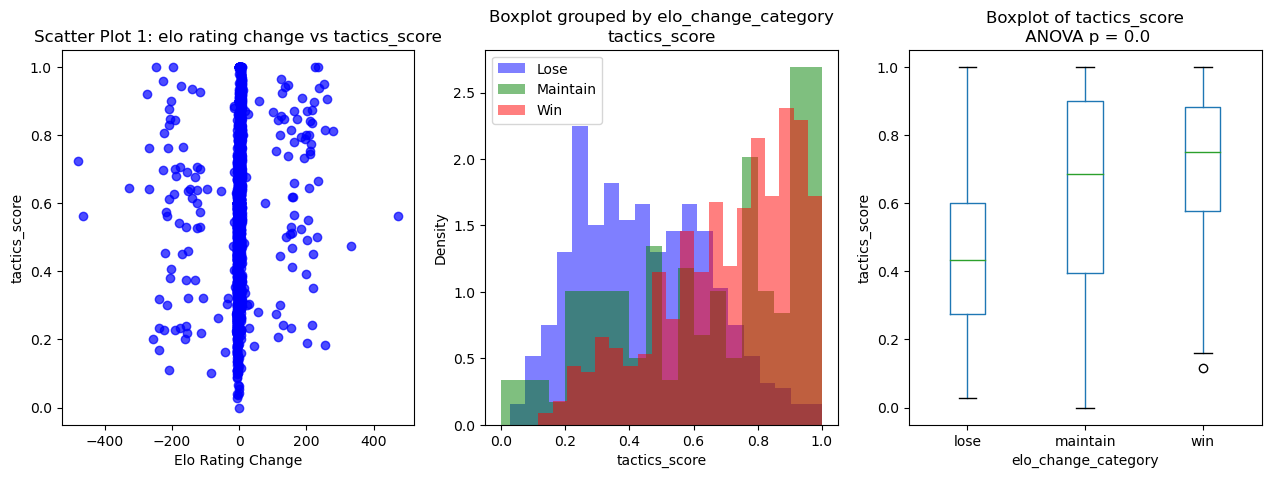

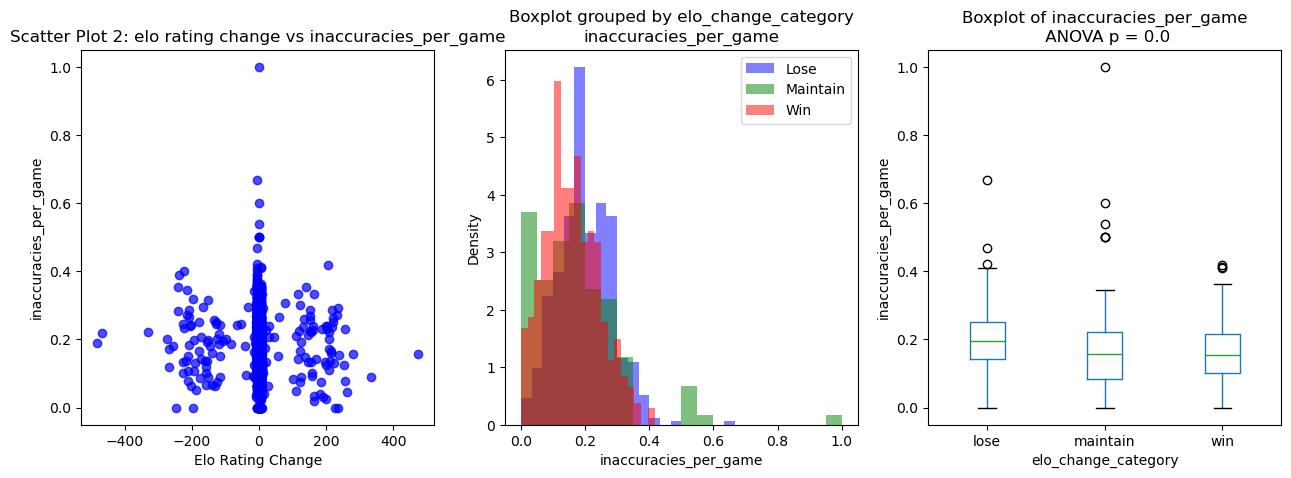

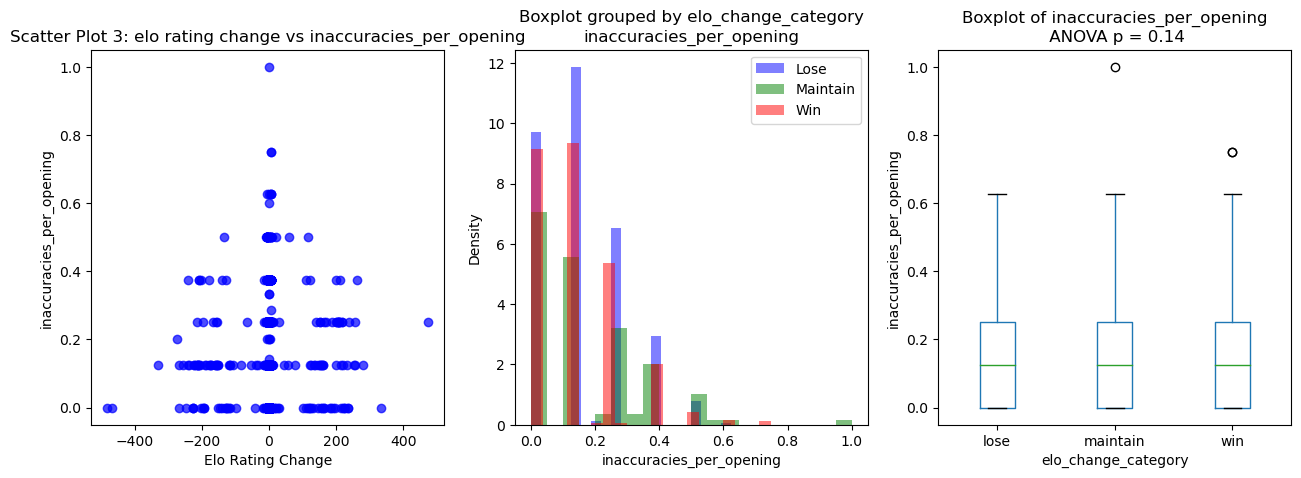

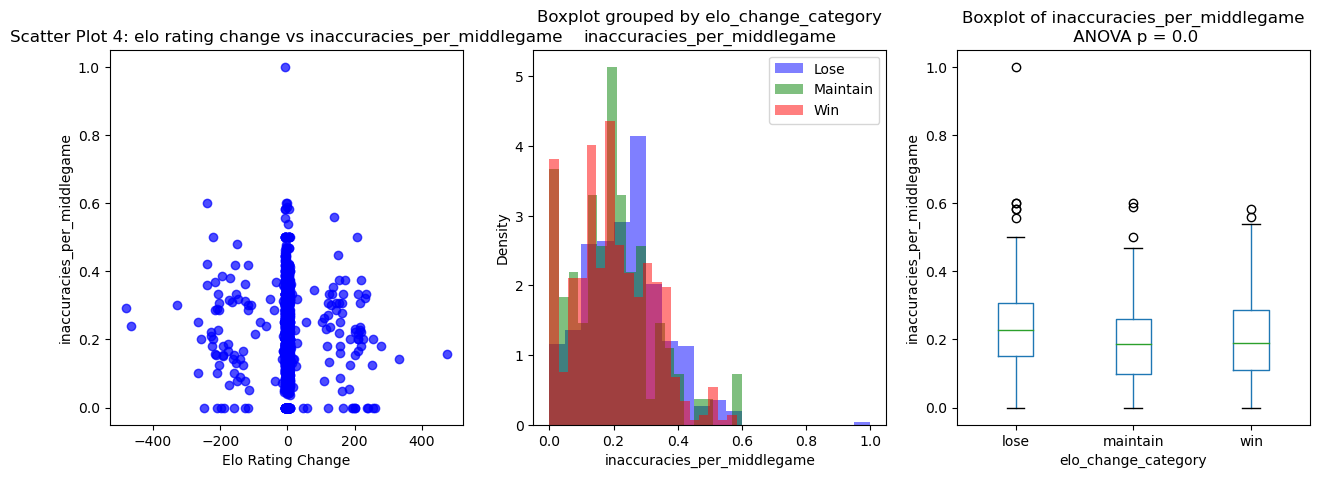

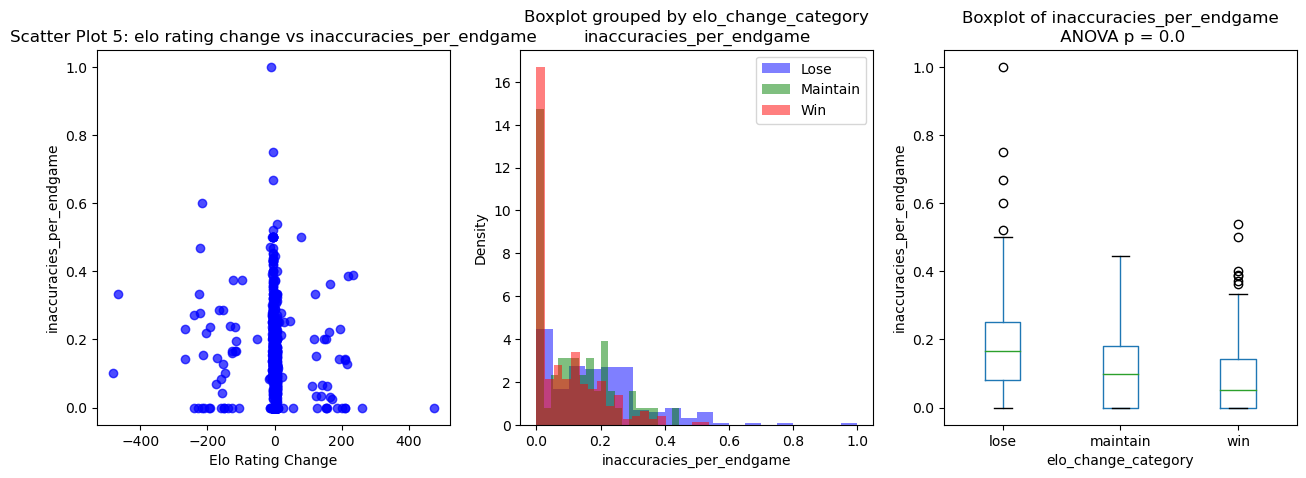

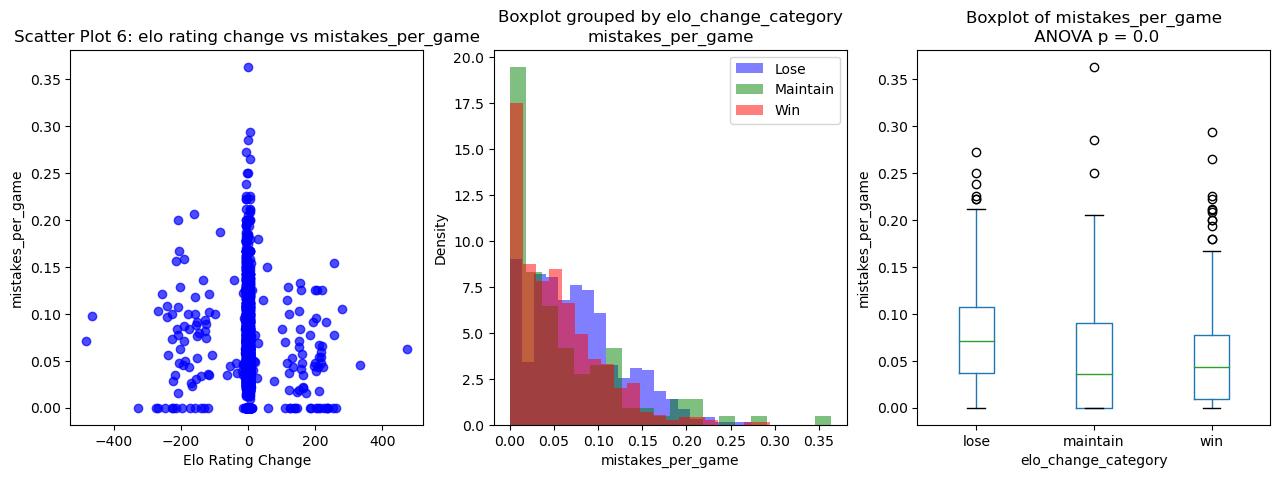

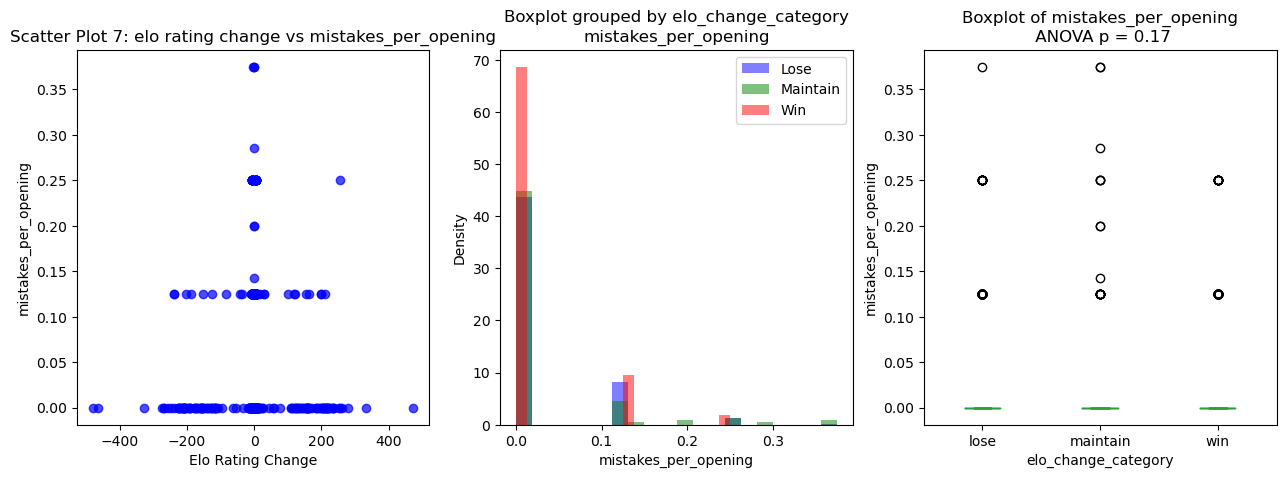

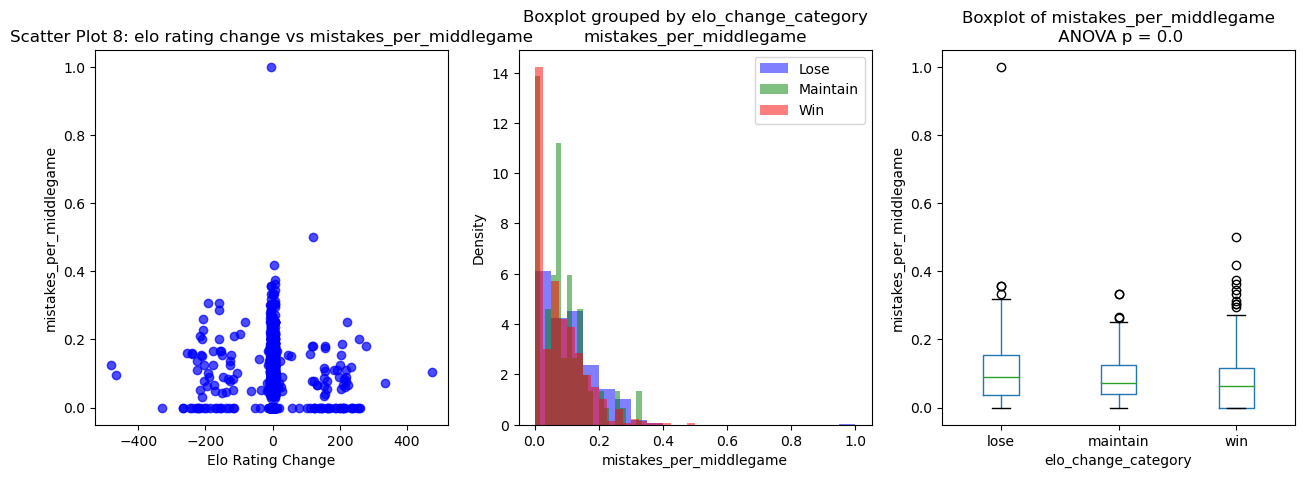

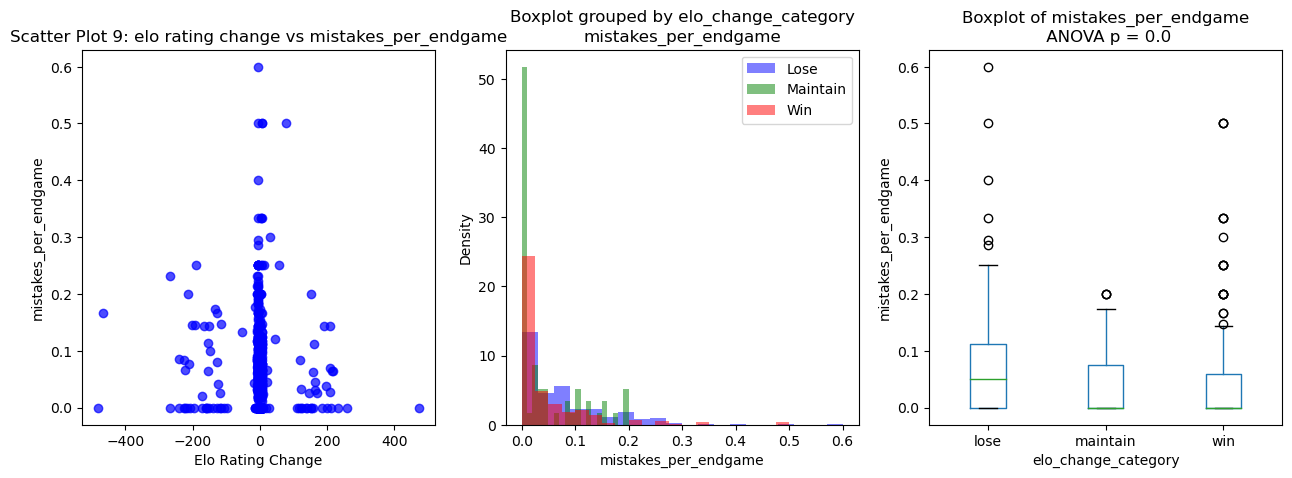

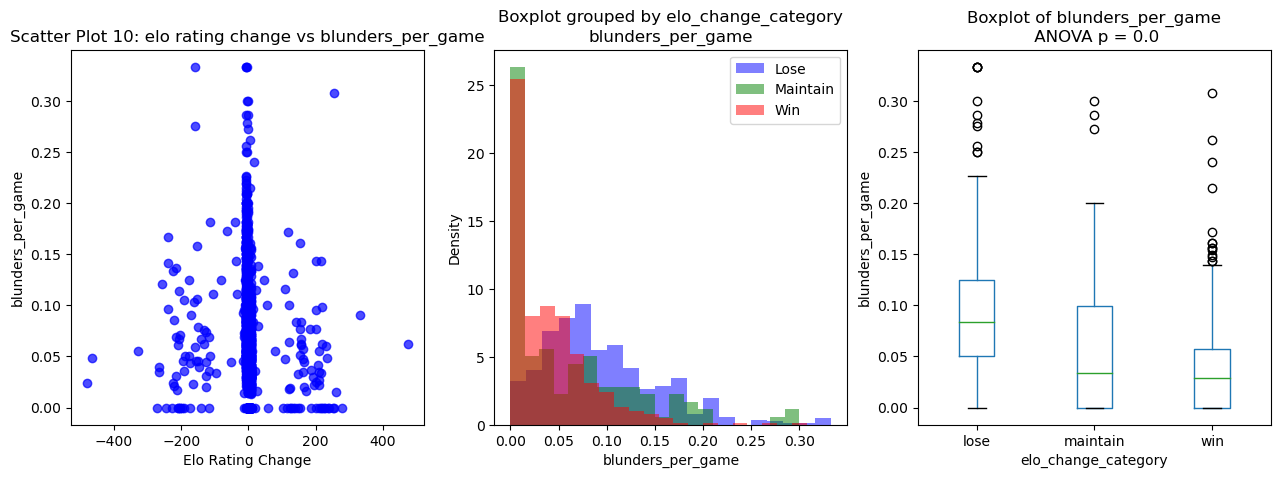

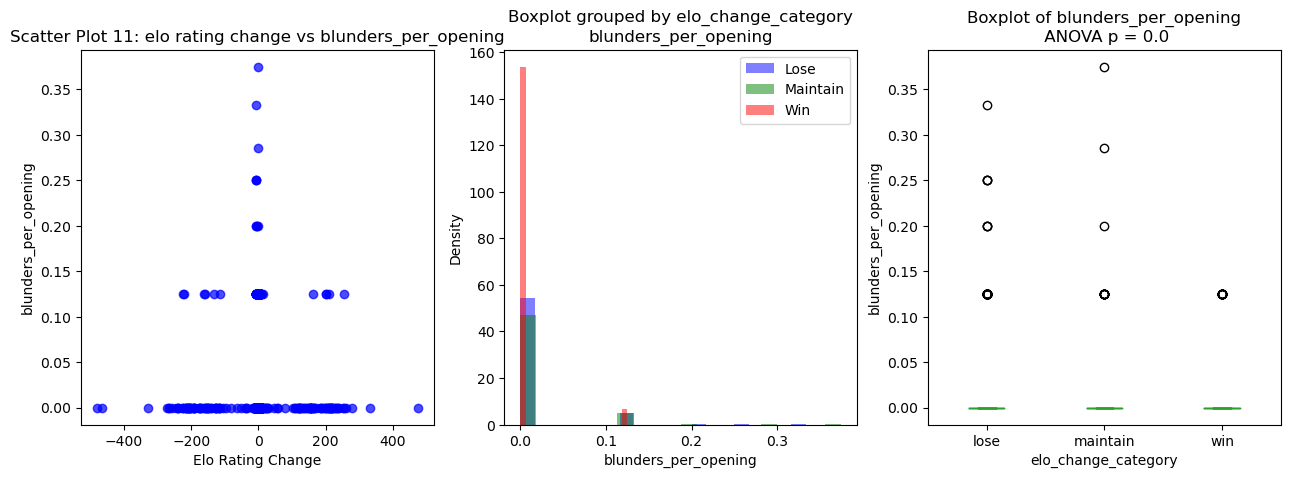

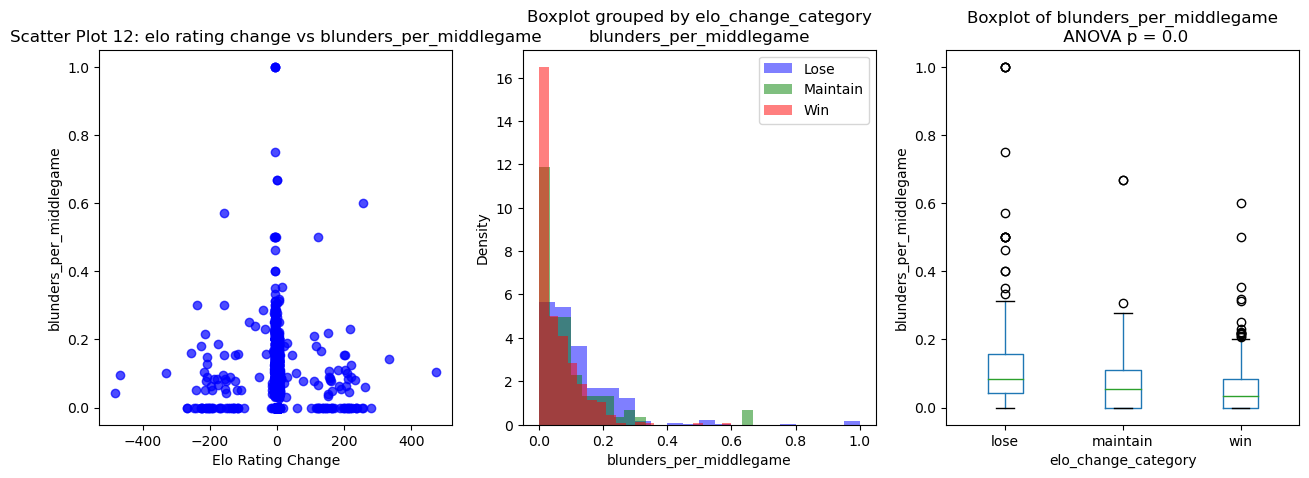

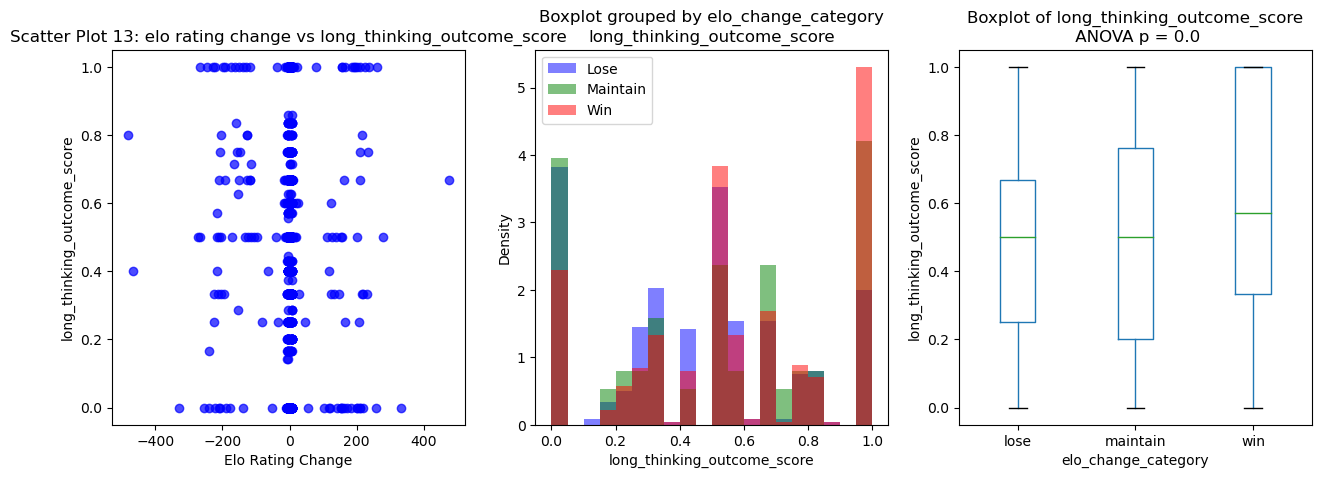

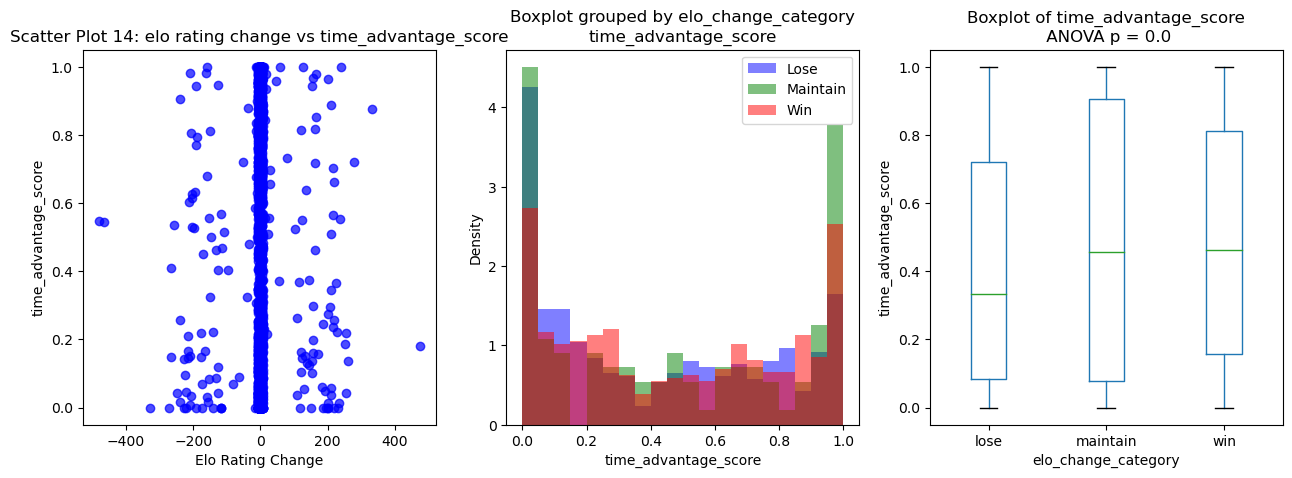

In [25]:


for i, variable in enumerate(continuous_var):
    tmp = chess_player[['elo_change_category',variable]].dropna()
    summary_stat = tmp.groupby('elo_change_category')[variable].agg(['mean', 'median',])
    f_statistic, p_value = stats.f_oneway(tmp.loc[tmp['elo_change_category']=='win',variable],
                                         tmp.loc[tmp['elo_change_category']=='maintain',variable],
                                         tmp.loc[tmp['elo_change_category']=='lose',variable])
    
    print(f'ANOVA for {variable}, p = {round(p_value,2)}')
    print(summary_stat)
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    #chess_player[variable] = np.log(chess_player[variable]+1)
    
    axes[0].scatter(chess_player['elo_change'], chess_player[variable], color='blue', alpha=0.7, label='Data Points')  
    axes[0].set_title(f'Scatter Plot {i+1}: elo rating change vs {variable}')  
    axes[0].set_xlabel('Elo Rating Change')  
    axes[0].set_ylabel(variable) 
    #axes[0].axvline(x=-20, color='red', linestyle='--', linewidth=2)
    #axes[0].axvline(x=20, color='red', linestyle='--', linewidth=2)
  
    
    axes[1].hist(chess_player.loc[chess_player['elo_change_category']=='lose',variable], color='blue', density=True,bins=20, alpha=0.5, label='Lose')
    axes[1].hist(chess_player.loc[chess_player['elo_change_category']=='maintain',variable], color='green',density=True,bins=20, alpha=0.5, label='Maintain')
    axes[1].hist(chess_player.loc[chess_player['elo_change_category']=='win',variable],color='red', density=True,bins=20, alpha=0.5, label='Win')
    axes[1].set_xlabel(variable)  
    axes[1].set_ylabel('Density')  
    axes[1].set_title(f'{variable}')  
    axes[1].legend()
         
    tmp.boxplot(column=variable, by='elo_change_category', ax=axes[2],grid = False)
    #axes[2].set_ylim(-0.1, 1.1)
    axes[2].set_ylabel(variable)  
    axes[2].set_title(f'Boxplot of {variable}\n ANOVA p = {round(p_value,2)}')
    